In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## !pip install seaborn

In [2]:
## to deal with your OS such as file manipulation , creating files folders etc , use OS module..
import os

In [ ]:
## to findk all the stuffs available at this particular path for this use listdir function of os

os.listdir(r'F:\Time_Series Data Analysis\Projects\S&P 500\individual_stocks_5yr\individual_stocks_5yr')

### The tech stocks we'll use for this analysis


In [2]:
path=r'F:\Time_Series Data Analysis\Projects\S&P 500\individual_stocks_5yr\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'IBM_data.csv', 'AMZN_data.csv']

#blank dataframe
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(4752, 7)

In [5]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [6]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [7]:
all_data['date']=pd.to_datetime(all_data['date'])

In [8]:
all_data['date'][0]

0   2013-02-08
0   2014-03-27
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

### Analyse closing price of each company

In [9]:
all_data['Name'].unique()

array(['AAPL', 'GOOG', 'IBM', 'AMZN'], dtype=object)

In [3]:
tech_list =all_data['Name'].unique()

In [11]:
tech_list

array(['AAPL', 'GOOG', 'IBM', 'AMZN'], dtype=object)

In [12]:
enumerate(tech_list)

In [13]:
for i, company in enumerate(tech_list,1):
    print(i)
    print(company)

1
AAPL
2
GOOG
3
IBM
4
AMZN


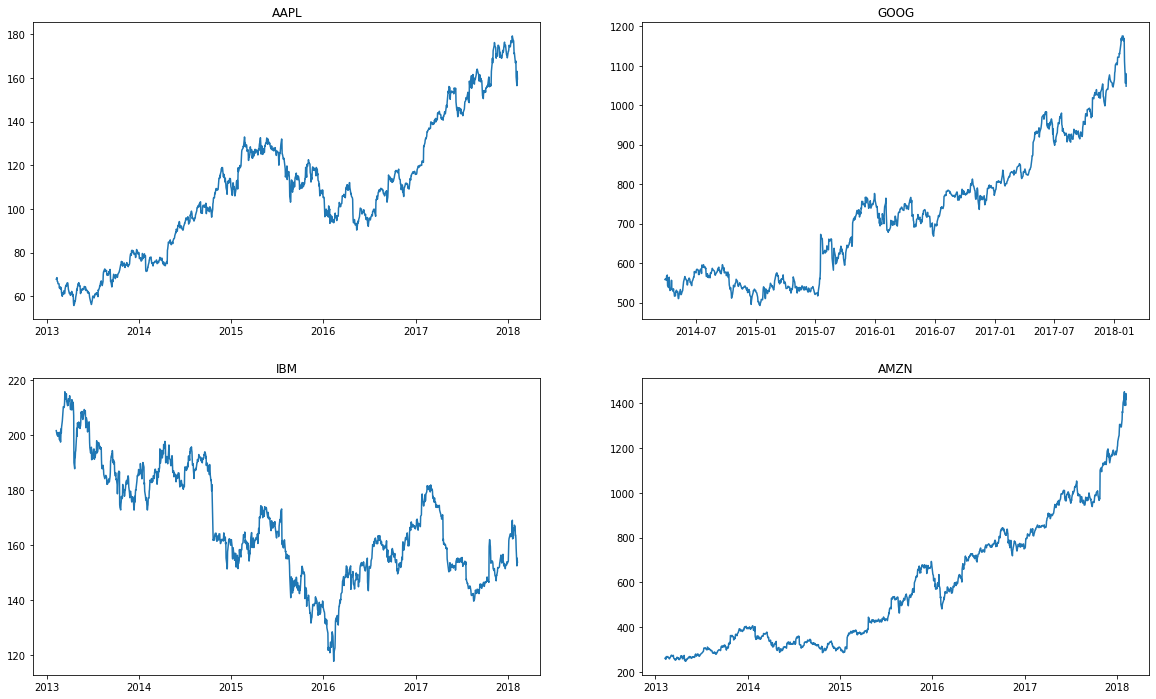

In [14]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

    

### Let's analyse the total volume of stock being traded each day

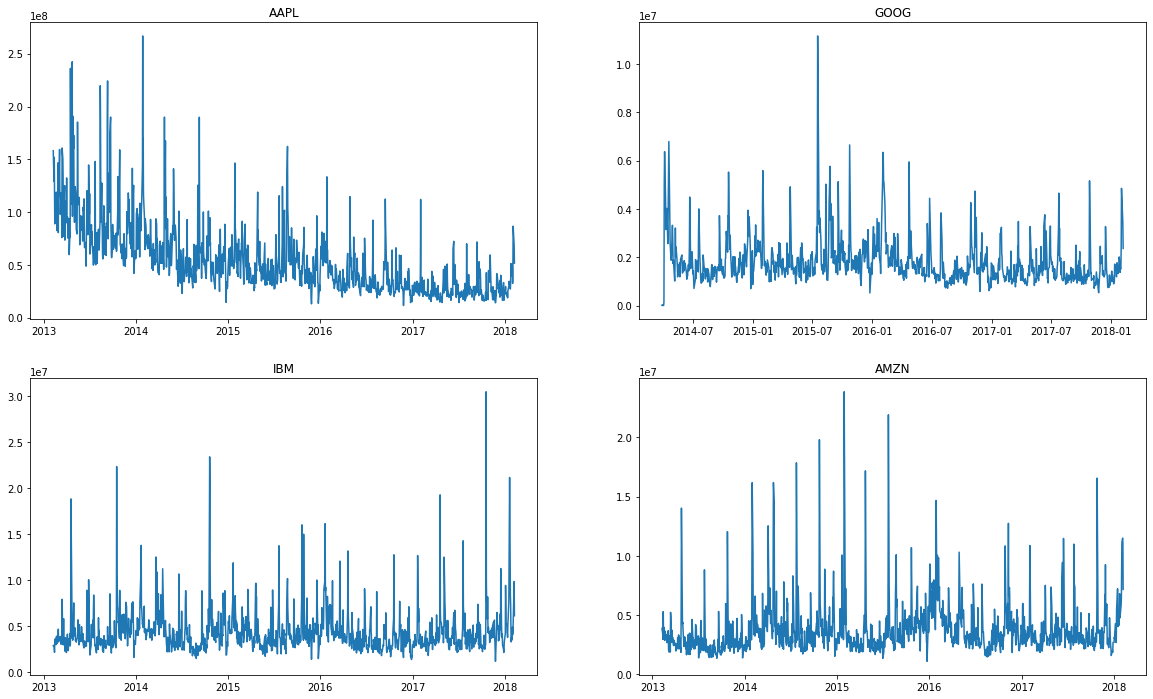

In [13]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)


### using plotly to make my visualisations more effective

In [18]:
## !pip install plotly

^C


In [15]:
import plotly.express as px

In [ ]:
for company in (tech_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x="date", y="volume", title=company)
    fig.show()

### analyse Daily price change in stock


    Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [17]:
df=pd.read_csv(r'F:\Time_Series Data Analysis\Projects\S&P 500\individual_stocks_5yr\individual_stocks_5yr/AMZN_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [18]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


In [ ]:
import plotly.express as px
fig = px.line(df, x="date", y="1day % return", title='')
fig.show()

### using matplotlib for visualisation

<AxesSubplot:>

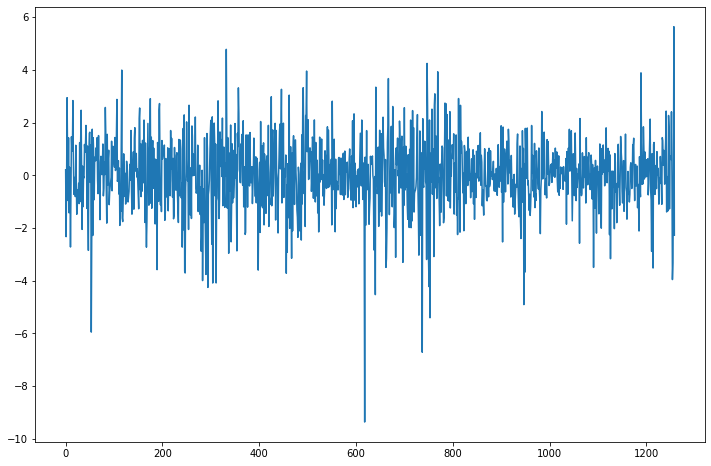

In [17]:
plt.figure(figsize=(10,6))
df['1day % return'].plot(figsize=(12,8))

#### lets say between some interval

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2016-04-18'),
  Text(0.0, 0, '2016-02-01'),
  Text(10.0, 0, '2016-02-16'),
  Text(20.0, 0, '2016-03-01'),
  Text(30.0, 0, '2016-03-15'),
  Text(40.0, 0, '2016-03-30'),
  Text(50.0, 0, '2016-04-13'),
  Text(60.0, 0, '2016-04-27'),
  Text(70.0, 0, '')])

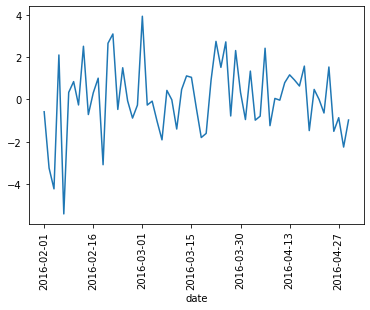

In [18]:
df.set_index('date')['2016-02-01':'2016-04-31']['1day % return'].plot()
plt.xticks(rotation='vertical')

In [19]:
df.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


### Analysing monthly closing price

In [19]:
df['date']=pd.to_datetime(df['date'])

In [20]:
df.set_index('date',inplace=True)

In [21]:
df.dtypes

open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
1day % return    float64
dtype: object

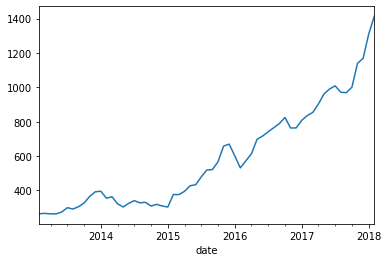

In [22]:
df['close'].resample('M').mean().plot()

### Analysing yearly closing price

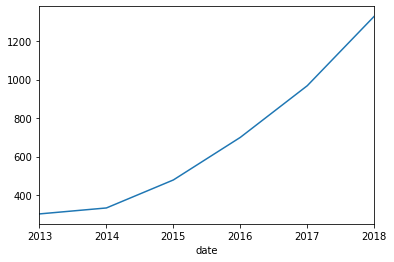

In [23]:
df['close'].resample('Y').mean().plot()

### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,IBM) are correlated or not


In [24]:
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'IBM_data.csv', 'AMZN_data.csv']

In [4]:
def read_data(path,filename):
    return pd.read_csv(path+"/"+filename)

In [26]:
path=r'F:\Time_Series Data Analysis\Projects\S&P 500\individual_stocks_5yr\individual_stocks_5yr'

In [27]:
aapl=read_data(path,company_list[0])

In [28]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [29]:
goog=read_data(path,company_list[1])

In [30]:
ibm=read_data(path,company_list[2])

In [31]:
amzn=read_data(path,company_list[3])

In [32]:
### create a blank dataframe in which I can store closing price of each tech
close=pd.DataFrame()


In [33]:
close['aapl']=aapl['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['ibm']=ibm['close']

In [34]:
close.head()

,aapl,goog,amzn,ibm
0,67.8542,558.46,261.95,201.68
1,68.5614,559.99,257.21,200.16
2,66.8428,556.97,258.70,200.04
3,66.7156,567.16,269.47,200.09
4,66.6556,567.00,269.24,199.65


#### Multi-variate Analysis

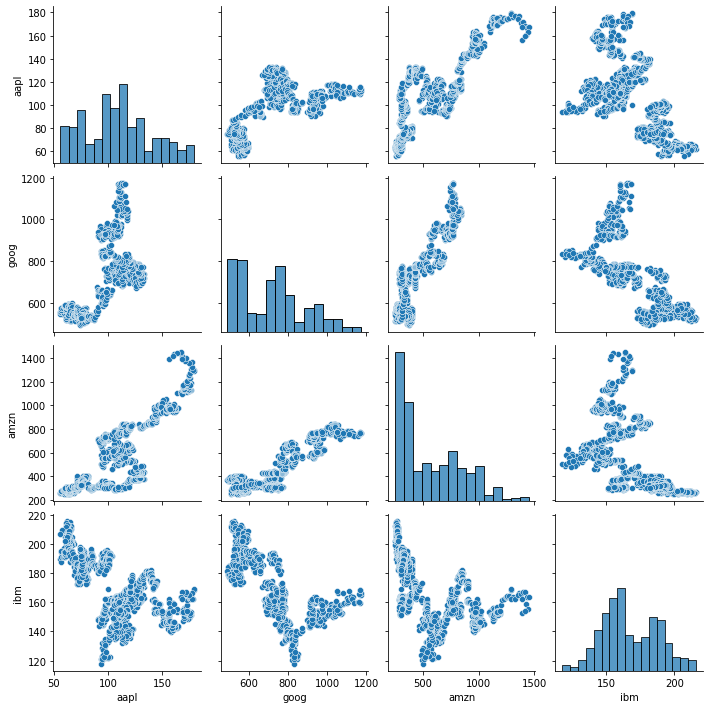

In [36]:
sns.pairplot(data=close)

### co-relation plot for stock prices

<AxesSubplot:>

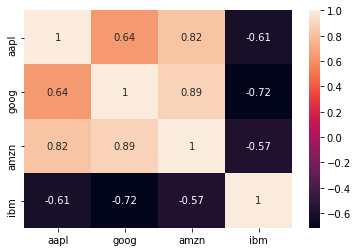

In [37]:
sns.heatmap(close.corr(),annot=True)

    Closing price of Google and amazon are well correlated
     and Closing price of Amazon and apple have a co-relation of 0.96

### Analyse Daily return of each stock & how they are co-related


In [35]:
data=pd.DataFrame()

In [36]:
data['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((ibm['close']-ibm['open'])/ibm['close'])*100

In [37]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.847878
1,0.714688,-0.216075,-2.328836,-0.409672
2,-2.481344,-1.781065,-0.189409,0.014997
3,-0.042869,1.489879,2.946525,-0.279874
4,0.443624,0.334039,0.694548,-0.040070


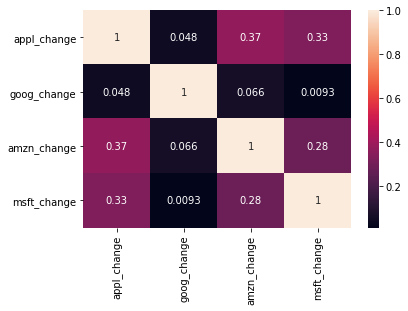

In [38]:
sns.heatmap(data.corr(),annot=True)

    We can see that Amazon and google have good correlation on daily returns

### Value at Risk analysis for Apple¶

In [42]:
import seaborn as sns

<AxesSubplot:xlabel='amzn_change', ylabel='Density'>

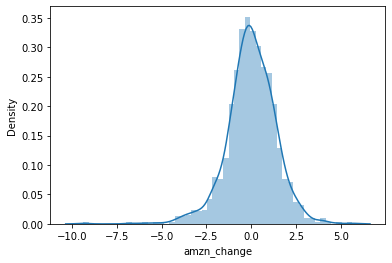

In [43]:
sns.distplot(data['amzn_change'])

    it somehow follows a normal distribution

In [44]:
data['amzn_change'].std()

1.3586786099495487

In [45]:
data['amzn_change'].quantile(0.1)

-1.5247436499501363

    It basically says that 90% of the times the worst daily Loss will not exceed -1.52

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.013804,0.874552,-4.242338,-0.486742,0.006366,0.523663,3.250933


In [5]:
amzn_df=read_data(path,company_list[3])

In [6]:
amzn_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [ ]:

fig=px.line(amzn_df, x="date", y=['open', 'high','low','close'])
fig.show()

    2017-01-20 is the date when Donald Trump takes office

### Relationship between MAoving average  and Closing Price

In [7]:
amzn_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [8]:
amzn_df.shape

(1259, 7)

In [78]:
# Moving Averages (10, 50 and 100)
amzn_df['10_d_avg'] = amzn_df['close'].rolling(window=10).mean()
amzn_df['50_d_avg'] = amzn_df['close'].rolling(window=50).mean()
amzn_df['100_d_avg'] = amzn_df['close'].rolling(window=100).mean()


In [79]:
amzn_df.head()

,date,open,high,low,close,volume,Name,10_d_avg,50_d_avg,100_d_avg
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,NaN,NaN,NaN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,NaN,NaN,NaN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,NaN,NaN,NaN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,NaN,NaN,NaN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,NaN,NaN,NaN


In [ ]:
close_p = amzn_df['close'].values.tolist()


In [80]:
amzn_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', '10_d_avg',
       '50_d_avg', '100_d_avg'],
      dtype='object')

In [ ]:
import plotly.express as px
fig=px.line(amzn_df,x="date",y=['close', '10_d_avg','50_d_avg','100_d_avg'])
fig.show()

    Summary:
    December and January tends to be the months were there are more upward trends for the stock.
    September tends to be the month with the most downward pressure.

### Analysing Amzon historical Prices(Close,open, high,low)

In [87]:
## !pip install chart_studio

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)


In [21]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [11]:
amzn_df['date']=pd.to_datetime(amzn_df['date'])

In [12]:
amzn_df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [13]:
amzn_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [14]:
amzn_df.shape

(1259, 7)

In [91]:
import datetime as dt

In [15]:
# 2017 onwards
last_year = amzn_df[amzn_df['date'].dt.year > 2017]


In [16]:
last_year.shape

(26, 7)

In [18]:
last_year

,date,open,high,low,close,volume,Name
1233,2018-01-02,1172.00,1190.00,1170.51,1189.01,2694494,AMZN
1234,2018-01-03,1188.30,1205.49,1188.30,1204.20,3108793,AMZN
1235,2018-01-04,1205.00,1215.87,1204.66,1209.59,3022089,AMZN
1236,2018-01-05,1217.51,1229.14,1210.00,1229.14,3544743,AMZN
1237,2018-01-08,1236.00,1253.08,1232.03,1246.87,4279475,AMZN
1238,2018-01-09,1256.90,1259.33,1241.76,1252.70,3661316,AMZN
1239,2018-01-10,1245.15,1254.33,1237.23,1254.33,2686017,AMZN
1240,2018-01-11,1259.74,1276.77,1256.46,1276.68,3125048,AMZN
1241,2018-01-12,1273.39,1305.76,1273.39,1305.20,5443730,AMZN
1242,2018-01-16,1323.00,1339.94,1292.30,1304.86,7220701,AMZN


In [19]:
g = last_year.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.head()


,open,high,low,close
date,,,,
2018-01-02,1172.00,1190.00,1170.51,1189.01
2018-01-03,1188.30,1205.49,1188.30,1204.20
2018-01-04,1205.00,1215.87,1204.66,1209.59
2018-01-05,1217.51,1229.14,1210.00,1229.14
2018-01-08,1236.00,1253.08,1232.03,1246.87


In [20]:
monthly_averages.shape

(26, 4)

In [23]:
monthly_averages.reset_index(inplace=True)


In [24]:
monthly_averages.head()

,date,open,high,low,close
0,2018-01-02,1172.00,1190.00,1170.51,1189.01
1,2018-01-03,1188.30,1205.49,1188.30,1204.20
2,2018-01-04,1205.00,1215.87,1204.66,1209.59
3,2018-01-05,1217.51,1229.14,1210.00,1229.14
4,2018-01-08,1236.00,1253.08,1232.03,1246.87


In [96]:
monthly_averages.dtypes

date     datetime64[ns]
open            float64
high            float64
low             float64
close           float64
dtype: object

In [ ]:
### using go.candlestick

In [26]:

trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist())


layout = {
    'title': 'Amazon Historical Price <br> <i>A closer look to the upward trend </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'}
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Prophet intro

    Facebook research team has come up new library for Time Series Analysis called Prophet.
    
    Their main goal is to to make it easier for experts and non-experts to make high quality forecasts that keep up with demand.
    

    There are several characteristics of Prophet that shows where Prophet works best:
        1.prophet will handle hourly, daily or all weekly observations with at least a few months (preferably a year) 
        of history
        2.Important holidays that occur at irregular intervals that are known in advance to prophet
        3.prophet will handle A reasonable number of missing observations or large outliers
        4.prophet will handle Historical trend changes
        5.prophet will handle Trends that are non-linear growth curves

In [47]:
from fbprophet import Prophet

In [48]:
m = Prophet()

### predict closing prices of amazon

In [49]:
df.head()

,open,high,low,close,volume,Name,1day % return
date,,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


In [50]:
df.drop(['open','high','low','volume','Name','1day % return'],axis=1,inplace=True)

In [51]:
df.head()

,close
date,
2013-02-08,261.95
2013-02-11,257.21
2013-02-12,258.70
2013-02-13,269.47
2013-02-14,269.24


In [52]:
df.reset_index(inplace=True)

In [53]:
df.head()

,date,close
0,2013-02-08,261.95
1,2013-02-11,257.21
2,2013-02-12,258.70
3,2013-02-13,269.47
4,2013-02-14,269.24


In [54]:
df.rename(columns={'date':'ds','close':'y'},inplace=True)

In [55]:
df.head()

,ds,y
0,2013-02-08,261.95
1,2013-02-11,257.21
2,2013-02-12,258.70
3,2013-02-13,269.47
4,2013-02-14,269.24


In [56]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

In [58]:
future_prices.shape

(1624, 1)

In [59]:
# Predict Prices
forecast = m.predict(future_prices)


In [60]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-02-08,232.589396,220.360683,297.174660,232.589396,232.589396,24.820956,24.820956,24.820956,-5.588764,-5.588764,-5.588764,30.409721,30.409721,30.409721,0.0,0.0,0.0,257.410352
1,2013-02-11,234.028371,213.956096,296.801433,234.028371,234.028371,20.068901,20.068901,20.068901,-5.344925,-5.344925,-5.344925,25.413826,25.413826,25.413826,0.0,0.0,0.0,254.097273
2,2013-02-12,234.508030,212.708629,293.925726,234.508030,234.508030,18.635632,18.635632,18.635632,-5.356313,-5.356313,-5.356313,23.991946,23.991946,23.991946,0.0,0.0,0.0,253.143662
3,2013-02-13,234.987688,213.339468,292.856531,234.987688,234.987688,17.314791,17.314791,17.314791,-5.410497,-5.410497,-5.410497,22.725287,22.725287,22.725287,0.0,0.0,0.0,252.302479
4,2013-02-14,235.467346,210.735725,292.525934,235.467346,235.467346,15.861331,15.861331,15.861331,-5.766492,-5.766492,-5.766492,21.627823,21.627823,21.627823,0.0,0.0,0.0,251.328677


In [61]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1619,2019-02-03,1740.081576,1387.383771,2073.030502
1620,2019-02-04,1720.516828,1360.973598,2046.719394
1621,2019-02-05,1719.934192,1365.677320,2053.036783
1622,2019-02-06,1719.256906,1360.308940,2052.672200
1623,2019-02-07,1718.259273,1357.472786,2048.603359


#### Plotting the Forecasts in fb Prophet

    Prophet has an inbuilt function that enables us to plot the forecasts we just generated. 
    This is achieved using model.plot() and passing in our forecasts as the argument. 
    The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

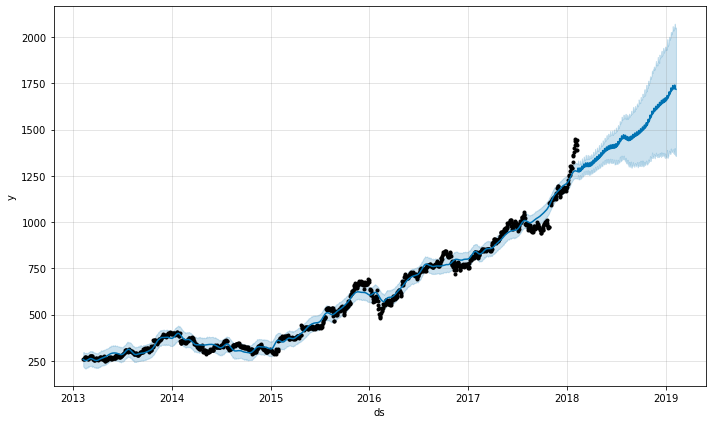

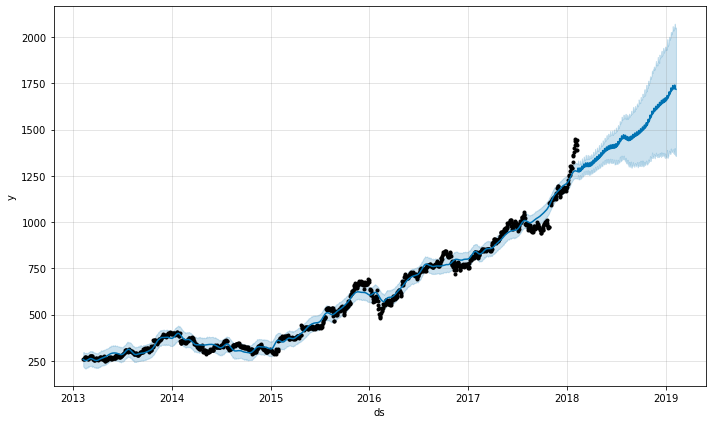

In [62]:
#### plot the predictions u will see these are with respect to yhat
m.plot(forecast)

In [ ]:
### plottinng components!

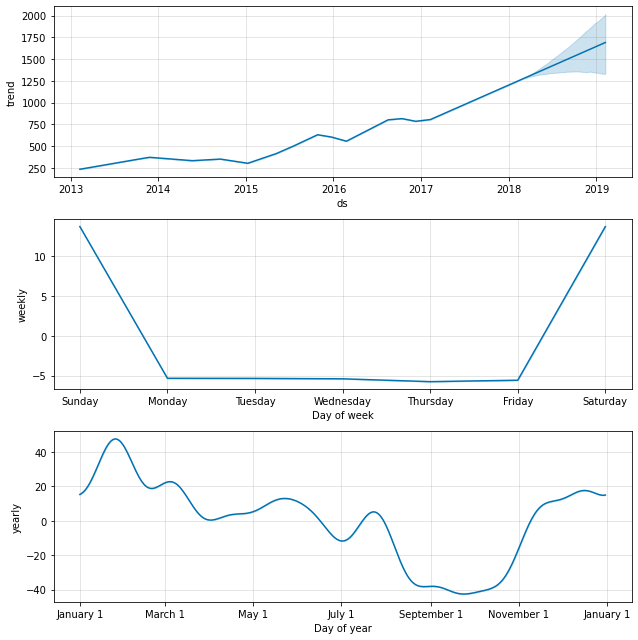

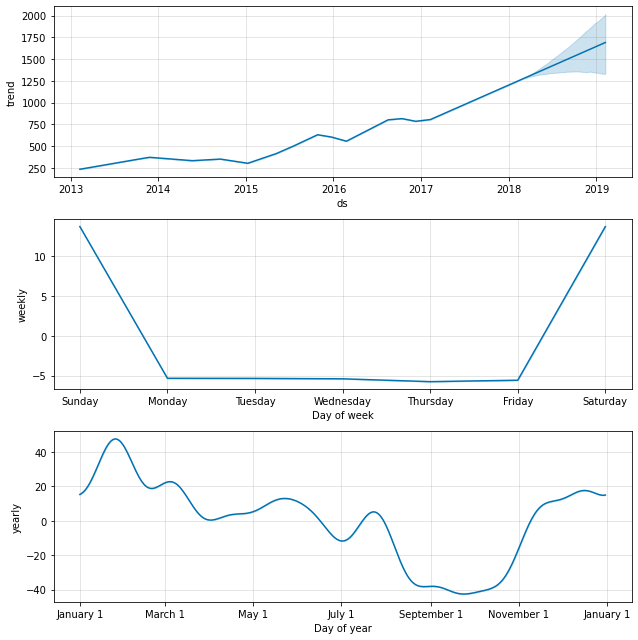

In [64]:
m.plot_components(forecast)

In [65]:
# Monthly Data Predictions
## Large values will allow many changepoints
## small values will allow few changepoints.

m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=12, freq='M')



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
future.head(20)

,ds
0,2013-02-08
1,2013-02-11
2,2013-02-12
3,2013-02-13
4,2013-02-14
5,2013-02-15
6,2013-02-19
7,2013-02-20
8,2013-02-21
9,2013-02-22


In [67]:
future.shape

(1271, 1)

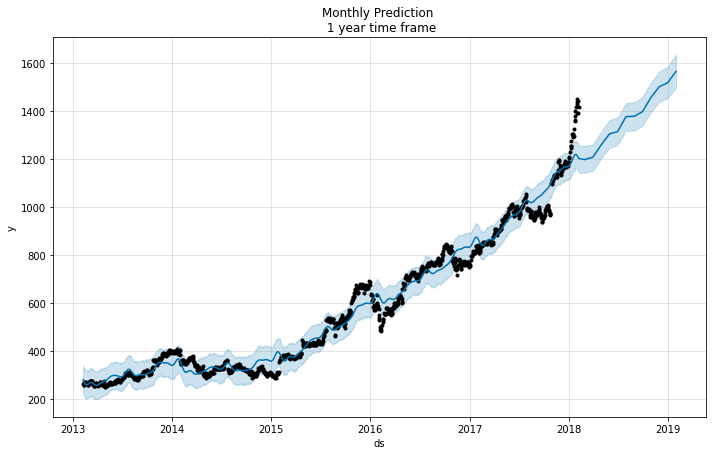

In [68]:
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

    Trends:
    Amazon's stock price is showing signs of upper trend yearly.
    Amazon's stock price show upper trend signs during January (December Sales tend to give a boost to Amazon's stock price)
    